#**Prophet vs XG-Boost vs LSTM**
**1**. **Facebook** **Prophet**

In [7]:
# importing important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [11]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [13]:
## viewing data
ethereum = pd.read_csv('/content/drive/MyDrive/ETH_USD_2015-08-09_2021-08-11-CoinDesk.csv')

ethereum.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,ETH,2015-08-09,0.909046,1.749289,1.916540,0.794497
1,ETH,2015-08-10,0.692321,0.909046,0.909046,0.692321
2,ETH,2015-08-11,0.668067,0.692321,0.692321,0.654331
3,ETH,2015-08-12,0.850151,0.668067,1.148621,0.668067
4,ETH,2015-08-13,1.266023,0.850151,1.266023,0.850151


In [ ]:
ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2162 non-null   object 
 1   Date                 2162 non-null   object 
 2   Closing Price (USD)  2162 non-null   float64
 3   24h Open (USD)       2162 non-null   float64
 4   24h High (USD)       2162 non-null   float64
 5   24h Low (USD)        2162 non-null   float64
dtypes: float64(4), object(2)
memory usage: 101.5+ KB


In [ ]:
#print the number of rows and colums.
print('Rows_Columns: ',  ethereum.shape)

Rows_Columns:  (2162, 6)


In [ ]:
ethereum.rename(columns={'Closing Price (USD)': 'closing_price'}, inplace=True)
ethereum.rename(columns={'24h Open (USD)': 'open'}, inplace=True)
ethereum.rename(columns={'24h High (USD)': 'high'}, inplace=True)
ethereum.rename(columns={'24h Low (USD)': 'low'}, inplace=True)

In [ ]:
ethereum_24 = ethereum

In [ ]:
ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Currency       2162 non-null   object 
 1   Date           2162 non-null   object 
 2   closing_price  2162 non-null   float64
 3   open           2162 non-null   float64
 4   high           2162 non-null   float64
 5   low            2162 non-null   float64
dtypes: float64(4), object(2)
memory usage: 101.5+ KB


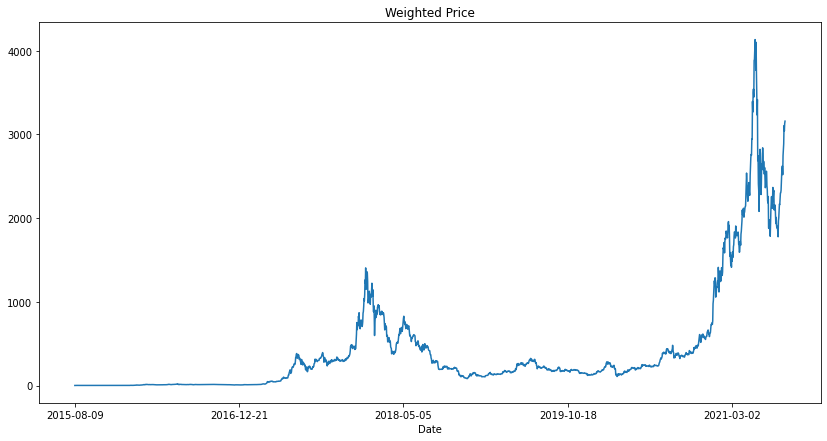

In [ ]:
#Data Preparation
#The time stamp column is set as the index
ethereum.set_index("Date").closing_price.plot(figsize=(14,7), title="Weighted Price")

In [ ]:
#finding missing values

#find the total sum of missing values in the data
null_values = ethereum.isnull().sum()

#find the percentage of number of missing values
null_percentage = (null_values/ethereum.shape[0])*100

#concatenate the null value and the null percentage  in a table
null_table = pd.concat([null_values,null_percentage], axis=1, ignore_index=True) 

#renaming the column to Total Null Values
null_table.rename(columns={0:'Total Null Values',1:'Null values percentage'}, inplace=True)
null_table

,Total Null Values,Null values percentage
Currency,0,0.0
Date,0,0.0
closing_price,0,0.0
open,0,0.0
high,0,0.0
low,0,0.0


In [ ]:
col = ethereum.loc[: , "open":"low"]
ethereum['mean'] = col.mean(axis=1)

In [ ]:
ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Currency       2162 non-null   object 
 1   Date           2162 non-null   object 
 2   closing_price  2162 non-null   float64
 3   open           2162 non-null   float64
 4   high           2162 non-null   float64
 5   low            2162 non-null   float64
 6   mean           2162 non-null   float64
dtypes: float64(5), object(2)
memory usage: 118.4+ KB


In [ ]:
ethereum.head()

,Currency,Date,closing_price,open,high,low,mean
0,ETH,2015-08-09,0.909046,1.749289,1.916540,0.794497,1.486775
1,ETH,2015-08-10,0.692321,0.909046,0.909046,0.692321,0.836804
2,ETH,2015-08-11,0.668067,0.692321,0.692321,0.654331,0.679658
3,ETH,2015-08-12,0.850151,0.668067,1.148621,0.668067,0.828252
4,ETH,2015-08-13,1.266023,0.850151,1.266023,0.850151,0.988775


In [ ]:
ethereum = ethereum.set_index('Date')
ethereum.head()

,Currency,closing_price,open,high,low,mean
Date,,,,,,
2015-08-09,ETH,0.909046,1.749289,1.916540,0.794497,1.486775
2015-08-10,ETH,0.692321,0.909046,0.909046,0.692321,0.836804
2015-08-11,ETH,0.668067,0.692321,0.692321,0.654331,0.679658
2015-08-12,ETH,0.850151,0.668067,1.148621,0.668067,0.828252
2015-08-13,ETH,1.266023,0.850151,1.266023,0.850151,0.988775


Text(0, 0.5, 'Weighted_Price')

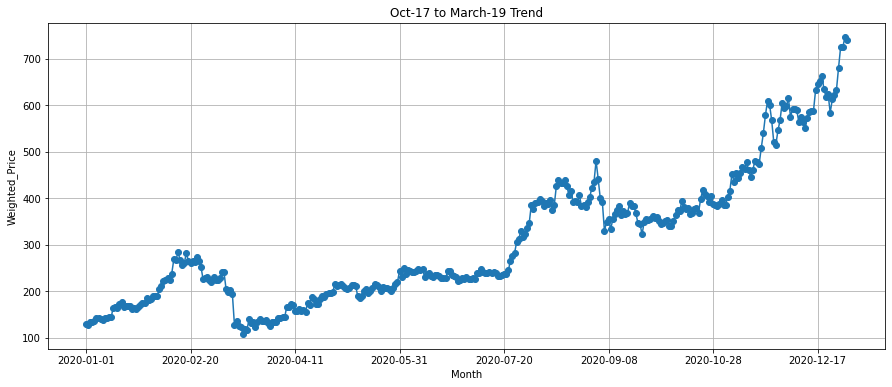

In [ ]:
#graph between 2020 Jan to 2021 Jan

gph = ethereum.loc['2020-01':'2021-01','closing_price'].plot(marker='o', linestyle='-',figsize=(15,6), title="Oct-17 to March-19 Trend", grid=True)
gph.set_xlabel('Month')
gph.set_ylabel('Weighted_Price')

In [ ]:
ethereum.reset_index(drop=False, inplace=True)

In [ ]:
lag_features = ["open", "high", "low", "closing_price"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = ethereum[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = ethereum[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = ethereum[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    ethereum[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    ethereum[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    ethereum[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    ethereum[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    ethereum[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    ethereum[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

ethereum.fillna(ethereum.mean(), inplace=True)

ethereum.set_index("Date", drop=False, inplace=True)
ethereum.head()

,Date,Currency,closing_price,open,high,low,mean,open_mean_lag3,open_mean_lag7,open_mean_lag30,open_std_lag3,open_std_lag7,open_std_lag30,high_mean_lag3,high_mean_lag7,high_mean_lag30,high_std_lag3,high_std_lag7,high_std_lag30,low_mean_lag3,low_mean_lag7,low_mean_lag30,low_std_lag3,low_std_lag7,low_std_lag30,closing_price_mean_lag3,closing_price_mean_lag7,closing_price_mean_lag30,closing_price_std_lag3,closing_price_std_lag7,closing_price_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-09,2015-08-09,ETH,0.909046,1.749289,1.916540,0.794497,1.486775,411.250526,408.577290,396.063732,16.601914,24.851812,52.597077,428.511651,425.686976,412.634993,14.442822,23.642564,53.684753,391.501927,388.926060,376.758034,16.294171,25.195690,51.747189,412.508123,409.749143,396.993688,16.289673,24.803105,52.889439
2015-08-10,2015-08-10,ETH,0.692321,0.909046,0.909046,0.692321,0.836804,1.749289,1.749289,1.749289,16.601914,24.851812,52.597077,1.916540,1.916540,1.916540,14.442822,23.642564,53.684753,0.794497,0.794497,0.794497,16.294171,25.195690,51.747189,0.909046,0.909046,0.909046,16.289673,24.803105,52.889439
2015-08-11,2015-08-11,ETH,0.668067,0.692321,0.692321,0.654331,0.679658,1.329167,1.329167,1.329167,0.594142,0.594142,0.594142,1.412793,1.412793,1.412793,0.712406,0.712406,0.712406,0.743409,0.743409,0.743409,0.072249,0.072249,0.072249,0.800683,0.800683,0.800683,0.153248,0.153248,0.153248
2015-08-12,2015-08-12,ETH,0.850151,0.668067,1.148621,0.668067,0.828252,1.116885,1.116885,1.116885,0.558295,0.558295,0.558295,1.172636,1.172636,1.172636,0.653290,0.653290,0.653290,0.713716,0.713716,0.713716,0.072491,0.072491,0.072491,0.756478,0.756478,0.756478,0.132683,0.132683,0.132683
2015-08-13,2015-08-13,ETH,1.266023,0.850151,1.266023,0.850151,0.988775,0.756478,1.004681,1.004681,0.132683,0.508090,0.508090,0.916663,1.166632,1.166632,0.228245,0.533544,0.533544,0.671573,0.702304,0.702304,0.019236,0.063437,0.063437,0.736846,0.779896,0.779896,0.098871,0.118026,0.118026


In [ ]:
ethereum.dtypes

Date                         object
Currency                     object
closing_price               float64
open                        float64
high                        float64
low                         float64
mean                        float64
open_mean_lag3              float64
open_mean_lag7              float64
open_mean_lag30             float64
open_std_lag3               float64
open_std_lag7               float64
open_std_lag30              float64
high_mean_lag3              float64
high_mean_lag7              float64
high_mean_lag30             float64
high_std_lag3               float64
high_std_lag7               float64
high_std_lag30              float64
low_mean_lag3               float64
low_mean_lag7               float64
low_mean_lag30              float64
low_std_lag3                float64
low_std_lag7                float64
low_std_lag30               float64
closing_price_mean_lag3     float64
closing_price_mean_lag7     float64
closing_price_mean_lag30    

In [ ]:
ethereum['Date'] = ethereum['Date'].astype('datetime64[s]')

ethereum.dtypes

Date                        datetime64[ns]
Currency                            object
closing_price                      float64
open                               float64
high                               float64
low                                float64
mean                               float64
open_mean_lag3                     float64
open_mean_lag7                     float64
open_mean_lag30                    float64
open_std_lag3                      float64
open_std_lag7                      float64
open_std_lag30                     float64
high_mean_lag3                     float64
high_mean_lag7                     float64
high_mean_lag30                    float64
high_std_lag3                      float64
high_std_lag7                      float64
high_std_lag30                     float64
low_mean_lag3                      float64
low_mean_lag7                      float64
low_mean_lag30                     float64
low_std_lag3                       float64
low_std_lag

In [ ]:
#extracting date and time features
ethereum["month"] = ethereum.Date.dt.month
ethereum["week"] = ethereum.Date.dt.week
ethereum["day"] = ethereum.Date.dt.day
ethereum["day_of_week"] = ethereum.Date.dt.dayofweek
ethereum.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Currency,closing_price,open,high,low,mean,open_mean_lag3,open_mean_lag7,open_mean_lag30,open_std_lag3,open_std_lag7,open_std_lag30,high_mean_lag3,high_mean_lag7,high_mean_lag30,high_std_lag3,high_std_lag7,high_std_lag30,low_mean_lag3,low_mean_lag7,low_mean_lag30,low_std_lag3,low_std_lag7,low_std_lag30,closing_price_mean_lag3,closing_price_mean_lag7,closing_price_mean_lag30,closing_price_std_lag3,closing_price_std_lag7,closing_price_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-09,2015-08-09,ETH,0.909046,1.749289,1.916540,0.794497,1.486775,411.250526,408.577290,396.063732,16.601914,24.851812,52.597077,428.511651,425.686976,412.634993,14.442822,23.642564,53.684753,391.501927,388.926060,376.758034,16.294171,25.195690,51.747189,412.508123,409.749143,396.993688,16.289673,24.803105,52.889439,8,32,9,6
2015-08-10,2015-08-10,ETH,0.692321,0.909046,0.909046,0.692321,0.836804,1.749289,1.749289,1.749289,16.601914,24.851812,52.597077,1.916540,1.916540,1.916540,14.442822,23.642564,53.684753,0.794497,0.794497,0.794497,16.294171,25.195690,51.747189,0.909046,0.909046,0.909046,16.289673,24.803105,52.889439,8,33,10,0
2015-08-11,2015-08-11,ETH,0.668067,0.692321,0.692321,0.654331,0.679658,1.329167,1.329167,1.329167,0.594142,0.594142,0.594142,1.412793,1.412793,1.412793,0.712406,0.712406,0.712406,0.743409,0.743409,0.743409,0.072249,0.072249,0.072249,0.800683,0.800683,0.800683,0.153248,0.153248,0.153248,8,33,11,1
2015-08-12,2015-08-12,ETH,0.850151,0.668067,1.148621,0.668067,0.828252,1.116885,1.116885,1.116885,0.558295,0.558295,0.558295,1.172636,1.172636,1.172636,0.653290,0.653290,0.653290,0.713716,0.713716,0.713716,0.072491,0.072491,0.072491,0.756478,0.756478,0.756478,0.132683,0.132683,0.132683,8,33,12,2
2015-08-13,2015-08-13,ETH,1.266023,0.850151,1.266023,0.850151,0.988775,0.756478,1.004681,1.004681,0.132683,0.508090,0.508090,0.916663,1.166632,1.166632,0.228245,0.533544,0.533544,0.671573,0.702304,0.702304,0.019236,0.063437,0.063437,0.736846,0.779896,0.779896,0.098871,0.118026,0.118026,8,33,13,3


In [ ]:
#splitting the data into training data and testing data
df_train = ethereum[ethereum.Date < "2020"]
df_test = ethereum[ethereum.Date >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_test.shape)

train shape : (1575, 35)
validation shape : (587, 35)


In [ ]:
independent_features = ['open_mean_lag3',
       'open_mean_lag7', 'open_mean_lag30', 'open_std_lag3', 'open_std_lag7',
       'open_std_lag30', 'high_mean_lag3', 'high_mean_lag7', 'high_mean_lag30',
       'high_std_lag3', 'high_std_lag7', 'high_std_lag30', 'low_mean_lag3',
       'low_mean_lag7', 'low_mean_lag30', 'low_std_lag3', 'low_std_lag7',
       'low_std_lag30', 'closing_price_mean_lag3', 'closing_price_mean_lag7',
       'closing_price_mean_lag30', 'closing_price_std_lag3', 'closing_price_std_lag7',
       'closing_price_std_lag30', 'month', 'week',
       'day', 'day_of_week']

In [ ]:
#Facebook Prophet
#!pip install pmdarima
from fbprophet import Prophet

In [ ]:
daily_data_fb = ethereum_24.reset_index()[['Date','closing_price']].rename({'Date':'ds','closing_price':'y'}, axis=1)
daily_data_fb.head()

,ds,y
0,2015-08-09,0.909046
1,2015-08-10,0.692321
2,2015-08-11,0.668067
3,2015-08-12,0.850151
4,2015-08-13,1.266023


In [ ]:
split_date = "2020-01-01"
train_fit = daily_data_fb['ds'] <= split_date
test_fit = daily_data_fb['ds'] > split_date

train_fb = daily_data_fb[train_fit]
test_fb = daily_data_fb[test_fit]

In [ ]:
print("train data shape :", train_fb.shape)
print("test data shape :", test_fb.shape)

train data shape : (1576, 2)
test data shape : (586, 2)


In [ ]:
model_fbp = Prophet()
for feature in independent_features:
    model_fbp.add_regressor(feature)

model_fbp.fit(df_train[["Date", "closing_price"] + independent_features].rename(columns={"Date": "ds", "closing_price": "y"}))

forecast = model_fbp.predict(df_test[["Date", "closing_price"] + independent_features].rename(columns={"Date": "ds"}))
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,closing_price_mean_lag3,closing_price_mean_lag3_lower,closing_price_mean_lag3_upper,closing_price_mean_lag30,closing_price_mean_lag30_lower,closing_price_mean_lag30_upper,closing_price_mean_lag7,closing_price_mean_lag7_lower,closing_price_mean_lag7_upper,closing_price_std_lag3,closing_price_std_lag3_lower,closing_price_std_lag3_upper,closing_price_std_lag30,closing_price_std_lag30_lower,closing_price_std_lag30_upper,closing_price_std_lag7,closing_price_std_lag7_lower,closing_price_std_lag7_upper,day,day_lower,day_upper,day_of_week,day_of_week_lower,day_of_week_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,high_mean_lag3,high_mean_lag3_lower,high_mean_lag3_upper,high_mean_lag30,...,low_std_lag30,low_std_lag30_lower,low_std_lag30_upper,low_std_lag7,low_std_lag7_lower,low_std_lag7_upper,month,month_lower,month_upper,open_mean_lag3,open_mean_lag3_lower,open_mean_lag3_upper,open_mean_lag30,open_mean_lag30_lower,open_mean_lag30_upper,open_mean_lag7,open_mean_lag7_lower,open_mean_lag7_upper,open_std_lag3,open_std_lag3_lower,open_std_lag3_upper,open_std_lag30,open_std_lag30_lower,open_std_lag30_upper,open_std_lag7,open_std_lag7_lower,open_std_lag7_upper,week,week_lower,week_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,207.895146,126.914355,186.814756,207.895146,207.895146,-53.522293,-53.522293,-53.522293,-70.541180,-70.541180,-70.541180,-108.285695,-108.285695,-108.285695,-165.890477,-165.890477,-165.890477,-3.057602,-3.057602,-3.057602,-1.237833,-1.237833,-1.237833,7.333293,7.333293,7.333293,-0.531174,-0.531174,-0.531174,0.137729,0.137729,0.137729,-53.448330,-53.448330,-53.448330,8.457553,8.457553,8.457553,-19.969099,...,9.977182,9.977182,9.977182,-4.081969,-4.081969,-4.081969,11.034713,11.034713,11.034713,69.528435,69.528435,69.528435,63.214640,63.214640,63.214640,108.965154,108.965154,108.965154,-2.715145,-2.715145,-2.715145,-24.533725,-24.533725,-24.533725,-0.687347,-0.687347,-0.687347,3.020671,3.020671,3.020671,-0.785035,-0.785035,-0.785035,0.711071,0.711071,0.711071,0.0,0.0,0.0,154.372853
1,2020-01-02,207.932189,123.751210,181.513986,207.932189,207.932189,-55.162530,-55.162530,-55.162530,-72.204158,-72.204158,-72.204158,-109.406973,-109.406973,-109.406973,-164.393350,-164.393350,-164.393350,-3.837626,-3.837626,-3.837626,-1.253570,-1.253570,-1.253570,7.576551,7.576551,7.576551,-0.495266,-0.495266,-0.495266,0.000087,0.000087,0.000087,-54.690861,-54.690861,-54.690861,8.654693,8.654693,8.654693,-20.159636,...,10.124289,10.124289,10.124289,-4.111449,-4.111449,-4.111449,11.034713,11.034713,11.034713,69.291173,69.291173,69.291173,63.987609,63.987609,63.987609,108.811561,108.811561,108.811561,-2.921093,-2.921093,-2.921093,-24.870427,-24.870427,-24.870427,-0.687709,-0.687709,-0.687709,3.020671,3.020671,3.020671,-0.140665,-0.140665,-0.140665,-0.331004,-0.331004,-0.331004,0.0,0.0,0.0,152.769659
2,2020-01-03,207.969233,117.504299,180.724901,207.969233,207.969233,-59.485731,-59.485731,-59.485731,-73.913747,-73.913747,-73.913747,-110.596352,-110.596352,-110.596352,-163.802464,-163.802464,-163.802464,-4.000766,-4.000766,-4.000766,-1.262408,-1.262408,-1.262408,7.832117,7.832117,7.832117,-0.459357,-0.459357,-0.459357,-0.137554,-0.137554,-0.137554,-56.314598,-56.314598,-56.314598,8.861523,8.861523,8.861523,-20.349489,...,10.250993,10.250993,10.250993,-4.238948,-4.238948,-4.238948,11.034713,11.034713,11.034713,70.758610,70.758610,70.758610,64.636192,64.636192,64.636192,107.830411,107.830411,107.830411,-3.498085,-3.498085,-3.498085,-25.162333,-25.162333,-25.162333,-0.709994,-0.709994,-0.709994,3.020671,3.020671,3.020671,-1.782478,-1.782478,-1.782478,-1.388655,-1.388655,-1.388655,0.0,0.0,0.0,148.483502
3,2020-01-04,208.006276,124.582791,184.985077,208.006276,208.006276,-5

In [ ]:
df_test["Forecast_Prophet"] = forecast.yhat.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



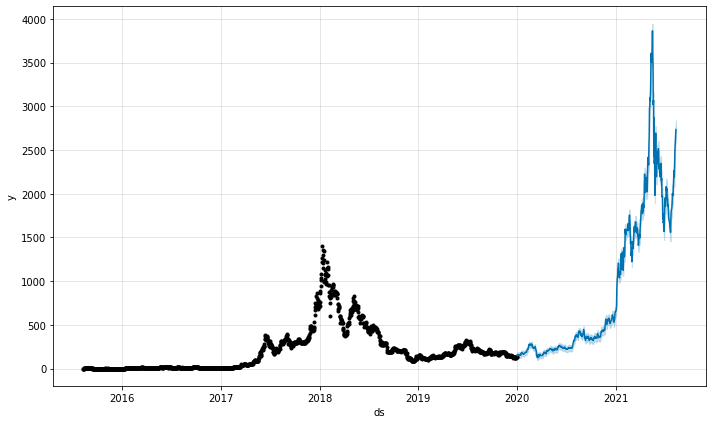

In [ ]:
fig1 = model_fbp.plot(forecast)

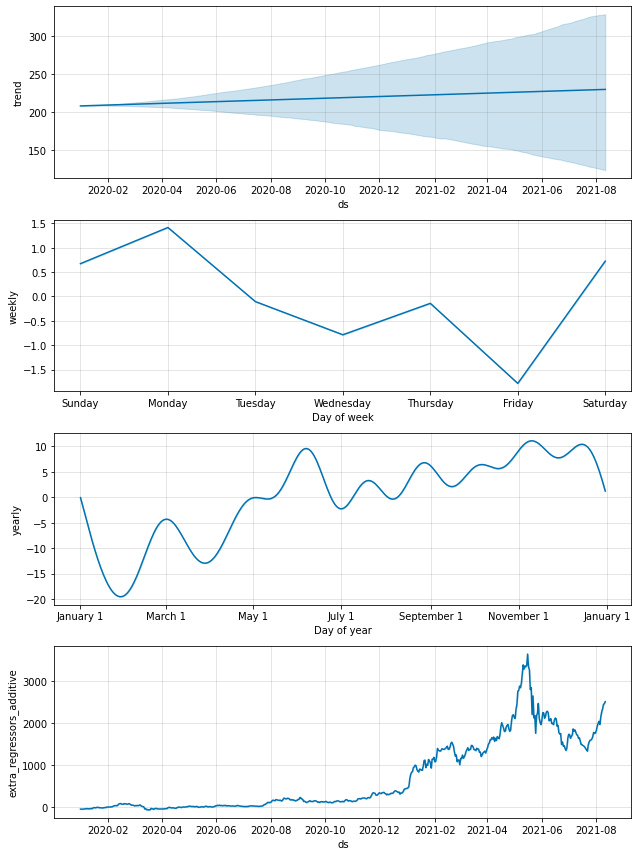

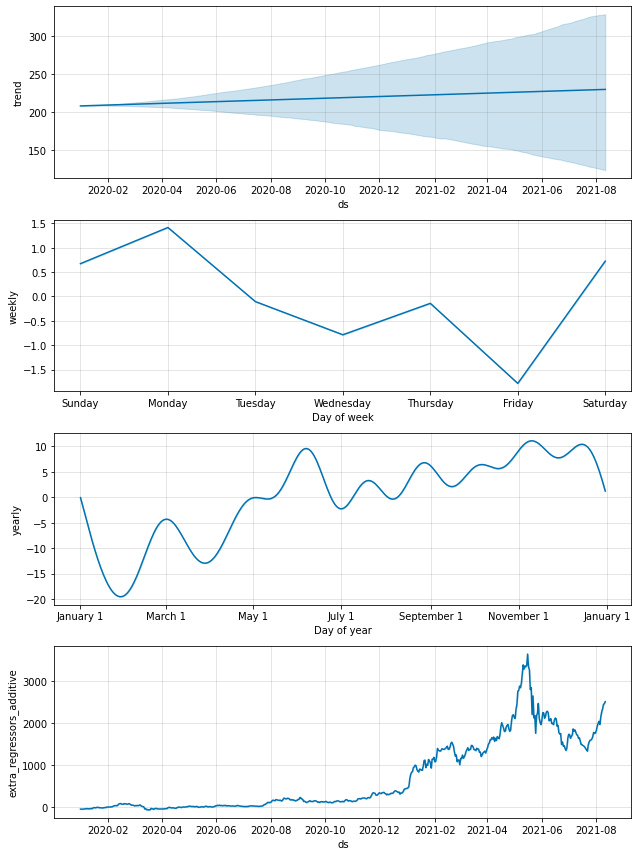

In [ ]:
model_fbp.plot_components(forecast)

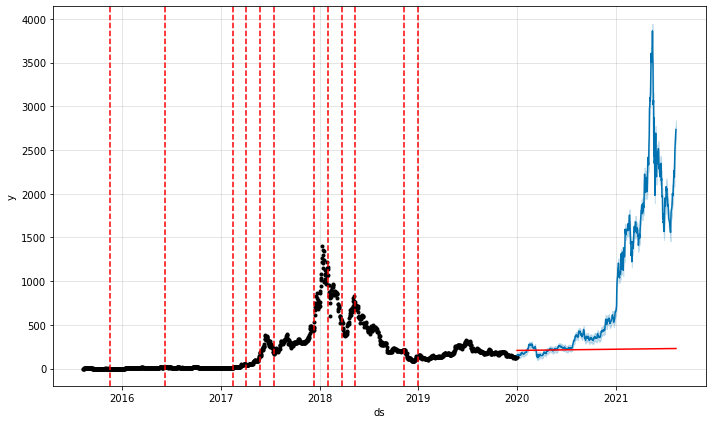

In [ ]:
# Plotting the changepoints where there is a sudden increase or decrease in the price of the ethereum
from fbprophet.plot import add_changepoints_to_plot
fig = model_fbp.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_fbp, forecast)

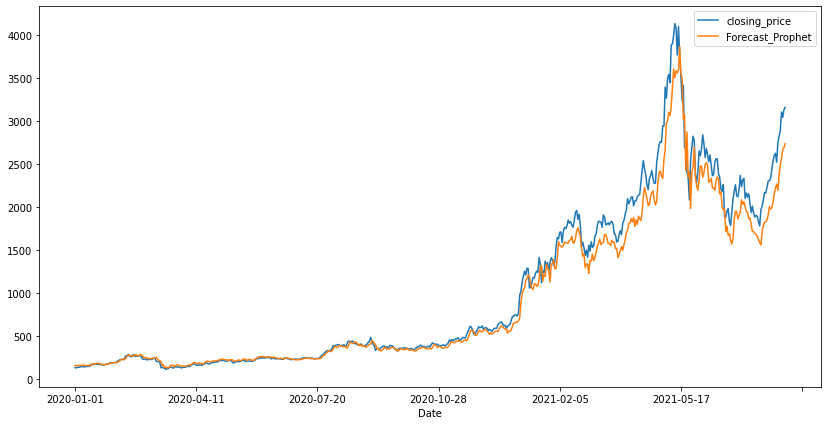

In [ ]:
#Plotting the actual and the predicted values of the ethereum prices
df_test[["closing_price", "Forecast_Prophet"]].plot(figsize=(14, 7))

In [ ]:
# importing the required libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
#Evaluation for the Facebook Prophet
test_mae = mean_absolute_error(df_test['closing_price'], df_test['Forecast_Prophet'])
test_rmse = np.sqrt(mean_squared_error(df_test['closing_price'], df_test['Forecast_Prophet']))
test_r2 = r2_score(df_test['closing_price'], df_test['Forecast_Prophet'])
test_mse =mean_squared_error(df_test['closing_price'], df_test['Forecast_Prophet'])
print(f" Prophet's MAE : {test_mae}")
print(f"Prophet's R2 : {test_r2}")
print(f"Prophet's RMSE : {test_rmse}")

 Prophet's MAE : 103.5832821789381
Prophet's R2 : 0.968638907466155
Prophet's RMSE : 172.00979766814928


In [ ]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [ ]:
test_mape = mean_absolute_percentage_error(df_test['closing_price'], df_test['Forecast_Prophet'])
print(f"Prophet's MAPE : {test_mape}")

Prophet's MAPE : 8.393884327502317


##**2**.  **XGBoost**

In [ ]:
#importing the libraries for the XGBoost
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import plot_importance, plot_tree
plt.style.use('fivethirtyeight')
from datetime import datetime

In [ ]:
#Splitting the dataset into test and train dataset
X_train, y_train = df_train[independent_features], df_train.closing_price
X_test, y_test = df_test[independent_features], df_test.closing_price

In [ ]:
# Initialising the model
reg = xgb.XGBRegressor()

In [ ]:
## Hyper Parameter Optimization Grid

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth"        : [1, 3, 4, 5, 6, 7],
 "n_estimators"     : [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
 "min_child_weight" : [int(x) for x in np.arange(3, 15, 1)],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "subsample"        : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9, 1],  
}

In [ ]:
# Initialising the model
model  = RandomizedSearchCV(    
                reg,
                param_distributions=params,
                n_iter=10,
                n_jobs=-1,
                cv=5,
                verbose=3,
)

In [ ]:
# Fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   46.6s finished


[23:38:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                                  0.6, 0.7, 0.8, 0.9, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                  

In [ ]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.2,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=4, min_child_weight=10, missing=None, n_estimators=1788,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.4, verbosity=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



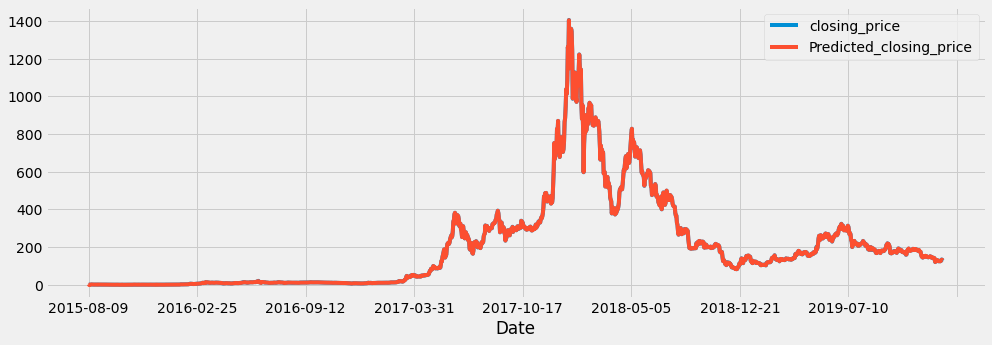

In [ ]:

df_train['Predicted_closing_price'] = model.predict(X_train)

df_train[['closing_price','Predicted_closing_price']].plot(figsize=(15, 5))

In [ ]:
df_test['Forecast_XGBoost'] = model.predict(X_test)

overall_data = pd.concat([df_train, df_test], sort=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



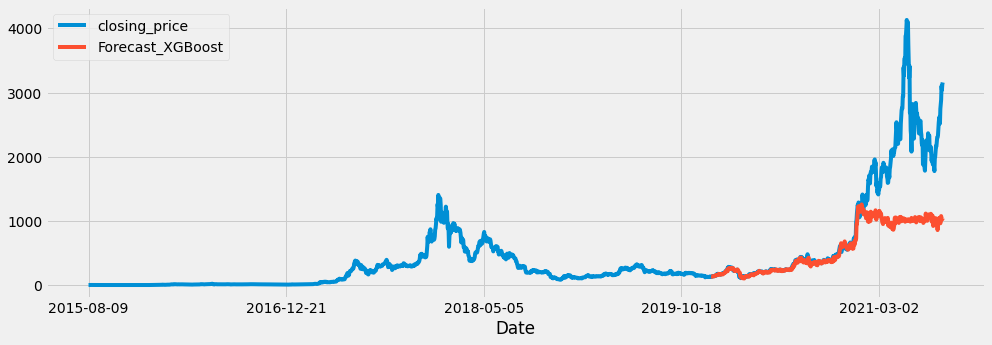

In [ ]:
overall_data[['closing_price','Forecast_XGBoost']].plot(figsize=(15, 5))

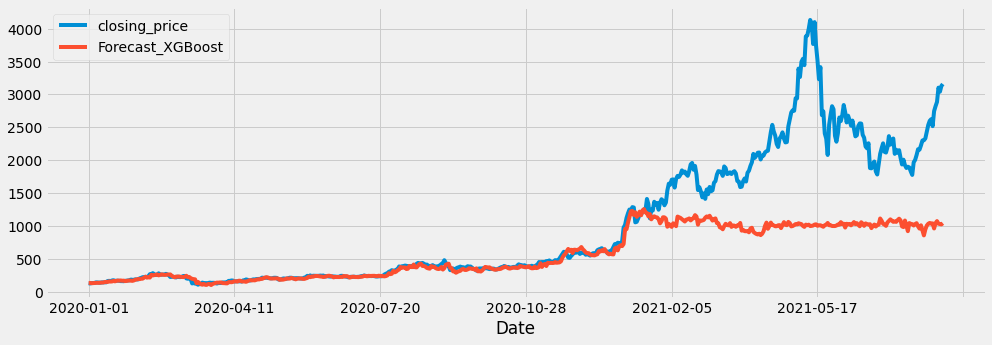

In [ ]:
df_test[['closing_price','Forecast_XGBoost']].plot(figsize=(15, 5))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:

train_mae = mean_absolute_error(df_train['closing_price'], df_train['Predicted_closing_price'])
train_rmse = np.sqrt(mean_squared_error(df_train['closing_price'], df_train['Predicted_closing_price']))
train_r2 = r2_score(df_train['closing_price'], df_train['Predicted_closing_price'])

print(f"train MAE : {train_mae}")
print(f"train RMSE : {train_rmse}")
print(f"train R2 : {train_r2}")

train MAE : 0.3531315185000102
train RMSE : 0.48488660710305853
train R2 : 0.9999960651504396


In [ ]:
test_mae = mean_absolute_error(df_test['closing_price'], df_test['Forecast_XGBoost'])
test_rmse = np.sqrt(mean_squared_error(df_test['closing_price'], df_test['Forecast_XGBoost']))
test_r2 = r2_score(df_test['closing_price'], df_test['Forecast_XGBoost'])

print(f"test MAE : {test_mae}")
print(f"test RMSE : {test_rmse}")
print(f"test R2 : {test_r2}")


test MAE : 422.54246162041926
test RMSE : 784.3769949454088
test R2 : 0.3478695047961916


In [ ]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [ ]:
test_mape = mean_absolute_percentage_error(df_test['closing_price'], df_test['Forecast_XGBoost'])
print(f"test MAPE : {test_mape}")

test MAPE : 21.52910237678008


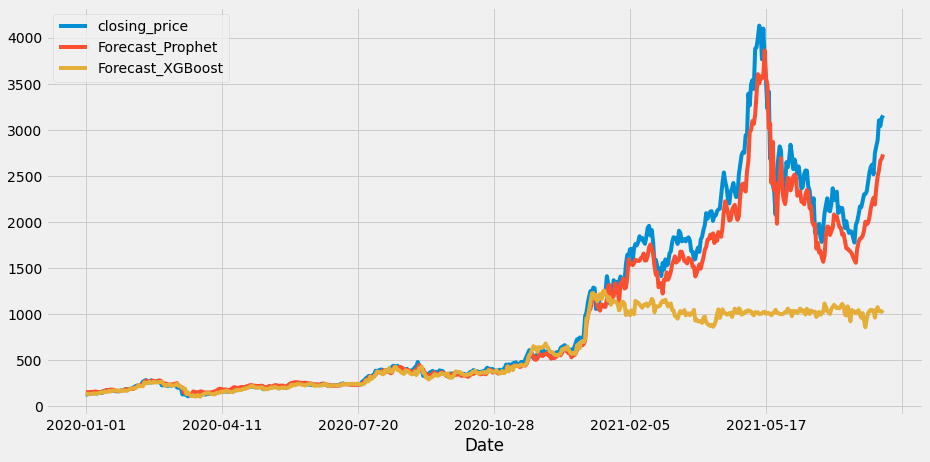

In [ ]:
#plot
df_test[["closing_price", "Forecast_Prophet", "Forecast_XGBoost"]].plot(figsize=(14,7))

In [ ]:
#compare
fbp_rmse = np.sqrt(mean_squared_error(df_test['closing_price'], df_test['Forecast_Prophet']))
xgb_rmse = np.sqrt(mean_squared_error(df_test['closing_price'], df_test['Forecast_XGBoost']))


fbp_mae = mean_absolute_error(df_test['closing_price'], df_test['Forecast_Prophet'])
xgb_mae = mean_absolute_error(df_test['closing_price'], df_test['Forecast_XGBoost'])



print("FB Prophet RMSE :", fbp_rmse)
print("XGBoost RMSE :", xgb_rmse)


print("FB Prophet MAE :", fbp_mae)
print("XGBoost MAE :", xgb_mae)

FB Prophet RMSE : 172.00979766814928
XGBoost RMSE : 784.3769949454088
FB Prophet MAE : 103.5832821789381
XGBoost MAE : 422.54246162041926


In [ ]:
price_series = ethereum_24.reset_index().closing_price.values
price_series

array([9.09046000e-01, 6.92321000e-01, 6.68067000e-01, ...,
       3.04147273e+03, 3.12880313e+03, 3.15837720e+03])

In [ ]:
price_series.shape

(2162,)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))

In [ ]:
price_series_scaled, price_series_scaled.shape

(array([[1.16315033e-04],
        [6.38688232e-05],
        [5.79994940e-05],
        ...,
        [7.35915321e-01],
        [7.57048779e-01],
        [7.64205533e-01]]), (2162, 1))

In [ ]:
train_data, test_data = price_series_scaled[0:1800], price_series_scaled[1800:]

In [ ]:
train_data.shape, test_data.shape

((1800, 1), (362, 1))

In [ ]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series)- time_step-1):
        a = series[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+ time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [ ]:
X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1699, 100), (1699,), (261, 100), (261,))

In [ ]:
#reshape inputs to be [samples, timesteps, features] which is requred for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape) 
print(X_test.shape)

(1699, 100, 1)
(261, 100, 1)


##**3**.  **LSTM**  ( **Long** **Short**-**Term** **Memory**)

In [ ]:
#Create Stacked LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
# LSTM FIT 
history = regressor.fit(X_train, y_train, validation_split=0.1, epochs = 50, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/50
48/48 [==============================] - 18s 235ms/step - loss: 0.0013 - val_loss: 6.6624e-04
Epoch 2/50
48/48 [==============================] - 10s 204ms/step - loss: 0.0042 - val_loss: 7.1815e-04
Epoch 3/50
48/48 [==============================] - 10s 203ms/step - loss: 0.0038 - val_loss: 9.5159e-04
Epoch 4/50
48/48 [==============================] - 10s 202ms/step - loss: 0.0033 - val_loss: 2.2983e-04
Epoch 5/50
48/48 [==============================] - 10s 203ms/step - loss: 0.0037 - val_loss: 2.1606e-04
Epoch 6/50
48/48 [==============================] - 10s 206ms/step - loss: 0.0036 - val_loss: 3.3968e-04
Epoch 7/50
48/48 [==============================] - 10s 205ms/step - loss: 0.0035 - val_loss: 2.7738e-04
Epoch 8/50
48/48 [==============================] - 10s 205ms/step - loss: 0.0031 - val_loss: 3.0806e-04
Epoch 9/50
48/48 [==============================] - 10s 204ms/step - loss: 0.0029 - val_loss: 1.9354e-04
Epoch 10/50
48/48 [==============================] - 10

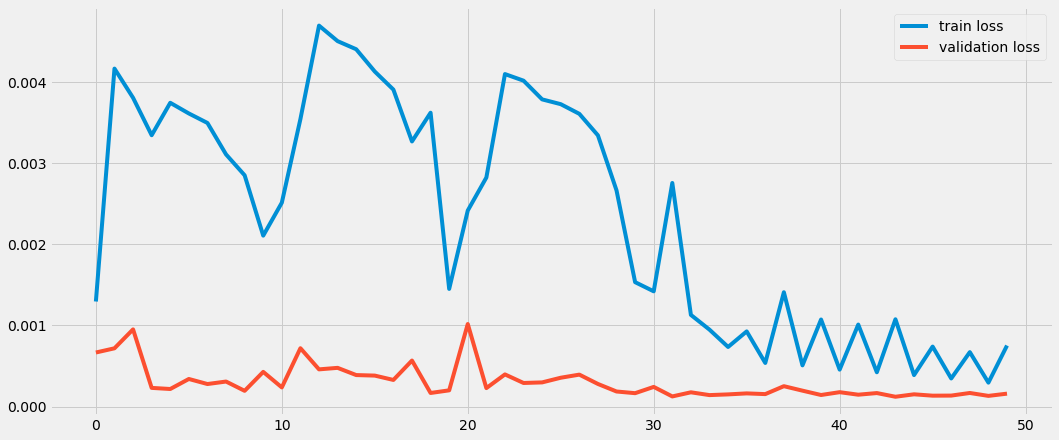

In [ ]:

#Plot train and validation loss
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend()



In [ ]:
#Prediction

train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

In [ ]:
#transform to previous form

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

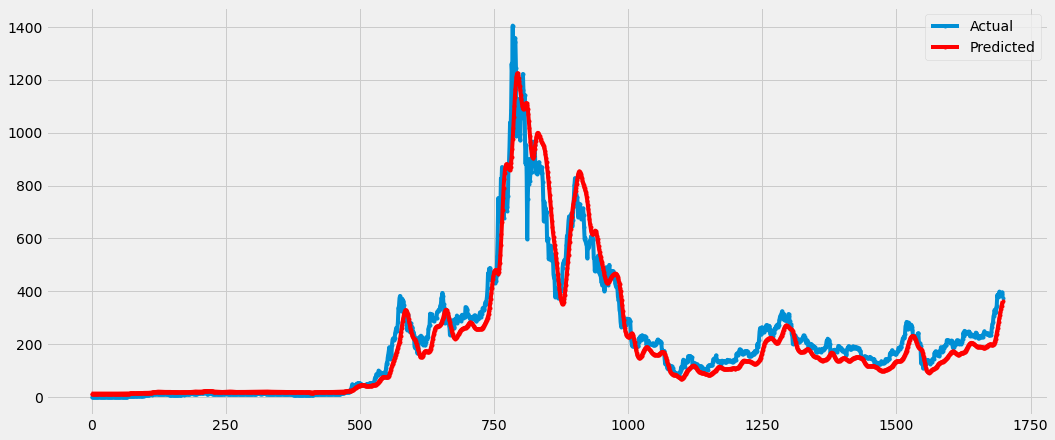

In [ ]:
#Plot the prediction 

plt.figure(figsize=(16,7))
plt.plot(y_train_inv.flatten(), marker='.', label="Actual")
plt.plot(train_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()

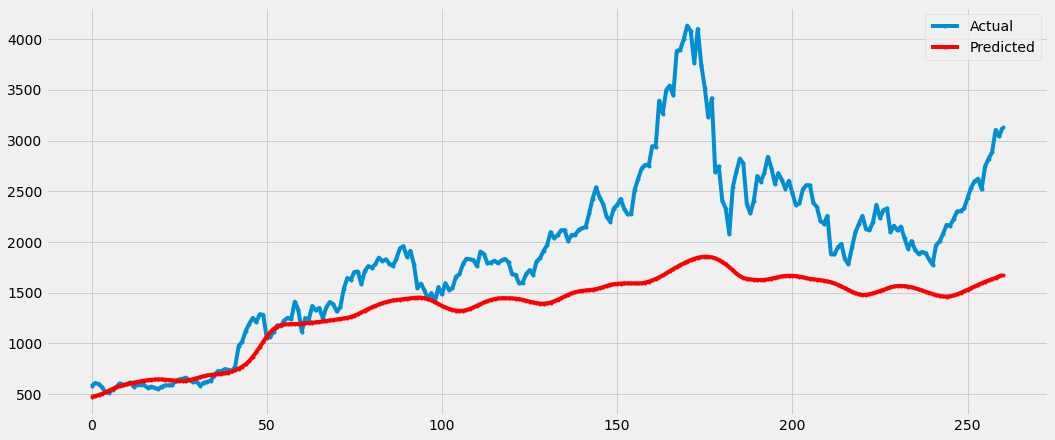

In [ ]:
#Forecasted Plot
plt.figure(figsize=(16,7))
plt.plot(y_test_inv.flatten(), marker='.', label="Actual")
plt.plot(test_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()


In [ ]:
#Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error

train_RMSE = np.sqrt(mean_squared_error(y_train_inv, train_predict_inv))
test_RMSE = np.sqrt(mean_squared_error(y_test_inv, test_predict_inv))
train_MAE = np.sqrt(mean_absolute_error(y_train_inv, train_predict_inv))
test_MAE = np.sqrt(mean_absolute_error(y_test_inv, test_predict_inv))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")



Train RMSE: 63.426152716412034
Train MAE: 6.435423027586762
Test RMSE: 739.2257116975795
Test MAE: 23.43822512046763


In [ ]:
# calculating the MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [ ]:
#Mean Absolute Percentage error value
mean_absolute_percentage_error(y_test_inv,test_predict_inv)

23.76947873576606

In [ ]:
#Calculating the R2 score for LSTM
from sklearn.metrics import r2_score
r2_score(y_test_inv,test_predict_inv)

0.16533648065074502